In [1]:
from fastai.vision import *

In [2]:
path = {}
path['camvid'] = untar_data(URLs.CAMVID_TINY)
path['camvid'].ls()

[PosixPath('/home/ravivijay/.fastai/data/camvid_tiny/images'),
 PosixPath('/home/ravivijay/.fastai/data/camvid_tiny/labels'),
 PosixPath('/home/ravivijay/.fastai/data/camvid_tiny/codes.txt')]

In [8]:
path['lbl'] = path['camvid']/'labels'
path['img'] = path['camvid']/'images'
print(path['lbl'].ls()[:3])
path['img'].ls()[:3]

[PosixPath('/home/ravivijay/.fastai/data/camvid_tiny/labels/0016E5_07973_P.png'), PosixPath('/home/ravivijay/.fastai/data/camvid_tiny/labels/Seq05VD_f00210_P.png'), PosixPath('/home/ravivijay/.fastai/data/camvid_tiny/labels/Seq05VD_f01080_P.png')]


[PosixPath('/home/ravivijay/.fastai/data/camvid_tiny/images/Seq05VD_f01830.png'),
 PosixPath('/home/ravivijay/.fastai/data/camvid_tiny/images/0001TP_008580.png'),
 PosixPath('/home/ravivijay/.fastai/data/camvid_tiny/images/0016E5_05190.png')]

In [11]:
codes = np.loadtxt(path['camvid']/'codes.txt', dtype=str); 
print(codes)

['Animal' 'Archway' 'Bicyclist' 'Bridge' 'Building' 'Car' 'CartLuggagePram' 'Child' 'Column_Pole' 'Fence'
 'LaneMkgsDriv' 'LaneMkgsNonDriv' 'Misc_Text' 'MotorcycleScooter' 'OtherMoving' 'ParkingBlock' 'Pedestrian' 'Road'
 'RoadShoulder' 'Sidewalk' 'SignSymbol' 'Sky' 'SUVPickupTruck' 'TrafficCone' 'TrafficLight' 'Train' 'Tree' 'Truck_Bus'
 'Tunnel' 'VegetationMisc' 'Void' 'Wall']


In [12]:
get_y_fn = lambda x: path['lbl']/f'{x.stem}_P{x.suffix}'

In [13]:
data = (SegmentationItemList.from_folder(path['img'])
        .split_by_rand_pct()
        .label_from_func(get_y_fn, classes=codes)
        .transform(get_transforms(), tfm_y=True, size=128)
        .databunch(bs=16, path=path['camvid'])
        .normalize(imagenet_stats)
        )

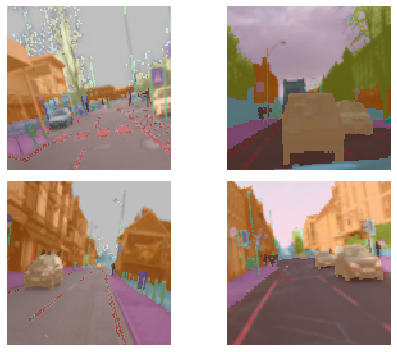

In [14]:
data.show_batch(rows=2, figsize=(7,5))

In [15]:
learn = unet_learner(data, models.resnet18)
learn.fit_one_cycle(3,1e-2)
learn.save('segment-camvid-1')

epoch,train_loss,valid_loss,time
0,13.812789,2.710190,00:04
1,21.996244,2.227642,00:01
2,14.799976,2.416595,00:01


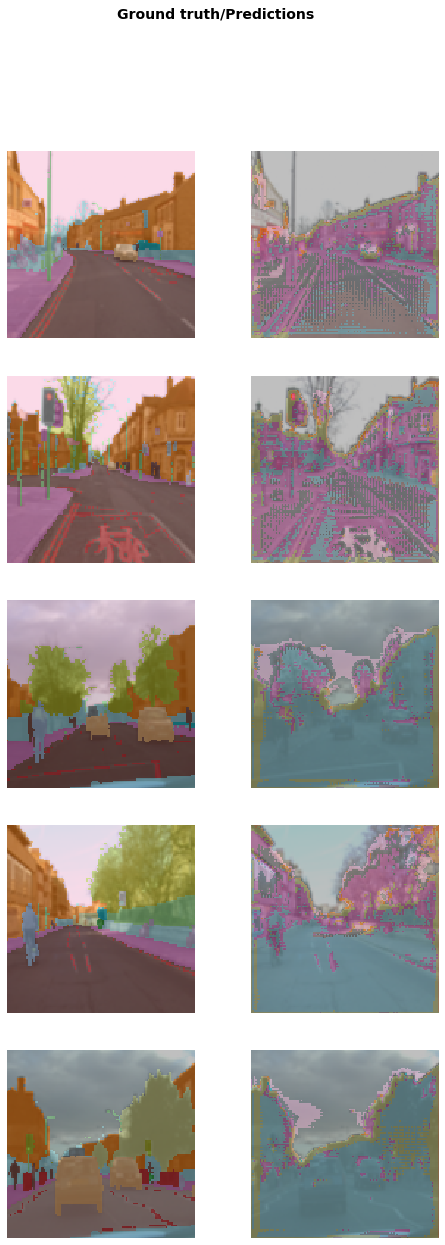

In [16]:
learn.show_results()